<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/credit_card_autoencoder_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 10th Nov, 2023
# Mumbai
# Created by Piyush Kumar  , UBI

In [1]:
# 1.0
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# 1.0.1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# 1.1
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Read data and process

In [4]:
# 2.0
pathToFolder= "/gdrive/MyDrive/Colab_data_files/creditcard/"
file = "creditcardfraud.zip"

In [5]:
# 2.0
df = pd.read_csv(pathToFolder + file)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# 2.0.1
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# 2.0.2
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# 3.0 Splitting genuine and fraudulent transactions:

df_g = df.loc[df.Class==0].reset_index(drop=True)
df_f = df.loc[df.Class==1].reset_index(drop=True)

In [ ]:
# 3.1
c0 = df_g.pop('Class')
c1 = df_f.pop('Class')

In [ ]:
# 3.2 Scaling both datasets:

ss = StandardScaler()
ss.fit(df_g)
df_g = ss.transform(df_g)
df_f = ss.transform(df_f)

StandardScaler()

In [ ]:
# 3.2.1
df_g.shape
print("\n----------------")
df_f.shape

(284315, 30)


----------------


(492, 30)

## Autoencoder model

In [ ]:
# 4.1
encoder = tf.keras.models.Sequential([
              tf.keras.layers.Input(shape=df_g.shape[-1:]),
              tf.keras.layers.Dense(100, activation='elu'),
              tf.keras.layers.Dense(50, activation = 'relu'),
              tf.keras.layers.Dense(10, activation = 'selu')
            ])

In [ ]:
# 4.2
decoder = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(10,)),
            tf.keras.layers.Dense(50, activation = 'relu'),
            tf.keras.layers.Dense(100, activation = 'elu'),
            tf.keras.layers.Dense(df_g.shape[-1], activation='linear')
          ])

In [ ]:
# 4.3
stack_autoencoder  = tf.keras.models.Sequential([
                                                  encoder , decoder
                                                ])

In [ ]:
# 4.4
stack_autoencoder.compile(
                   loss="mse",
                   optimizer = 'adam'
                   )

In [ ]:
# 4.5
stack_autoencoder.fit(df_g, df_g, epochs=5)

Epoch 1/5
8885/8885 [==============================] - 27s 3ms/step - loss: 0.0661
Epoch 2/5
8885/8885 [==============================] - 28s 3ms/step - loss: 0.0643
Epoch 3/5
8885/8885 [==============================] - 26s 3ms/step - loss: 0.0630
Epoch 4/5
8885/8885 [==============================] - 26s 3ms/step - loss: 0.0617
Epoch 5/5
8885/8885 [==============================] - 26s 3ms/step - loss: 0.0590


In [ ]:
# 5.0
gen   =   stack_autoencoder.predict(df_g)
fraud = stack_autoencoder.predict(df_f)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# 5.1
dx = (np.square(fraud - df_f)).mean(axis=1)


array([[ 1.3435118e+00, -1.2564934e+00,  3.8822001e-01, ...,
         8.2683975e-01, -6.3095808e-01, -1.6543491e-01],
       [-1.0831451e+00, -1.3113203e+00, -1.5980717e+00, ...,
        -2.1630706e-01, -1.8612146e-03,  1.8189747e+00],
       [ 6.2830758e-01, -9.0429169e-01,  2.6764464e-01, ...,
        -7.1315303e-02, -2.1743023e+00, -3.5090530e-01],
       ...,
       [ 1.6824871e+00, -1.1643646e+00,  7.2442967e-01, ...,
         1.2630844e+00,  5.2276421e-01, -1.7726736e-01],
       [ 1.5524608e+00, -1.3039762e+00,  1.1187868e+00, ...,
         2.0904384e+00,  3.1397715e-01, -2.5973934e-01],
       [ 1.4365312e+00,  1.0006382e+00, -7.5705007e-02, ...,
        -9.1588065e-02, -1.0635367e-01, -9.6206084e-02]], dtype=float32)

In [ ]:
# 5.2
dx = np.vstack([df_g,df_f])

In [ ]:
dx.shape

(284807, 30)

In [ ]:
# 5.3
out = stack_autoencoder.predict(dx)

8901/8901 [==============================] - 18s 2ms/step


In [ ]:
# 5.4
error_dx = (np.square(out - dx)).mean(axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ca9f38aa080>,
 'caps': [<matplotlib.lines.Line2D at 0x7ca9e93e11b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ca9e6540130>],
 'medians': [<matplotlib.lines.Line2D at 0x7ca9e93e1e70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ca9f01a5480>],
 'means': []}

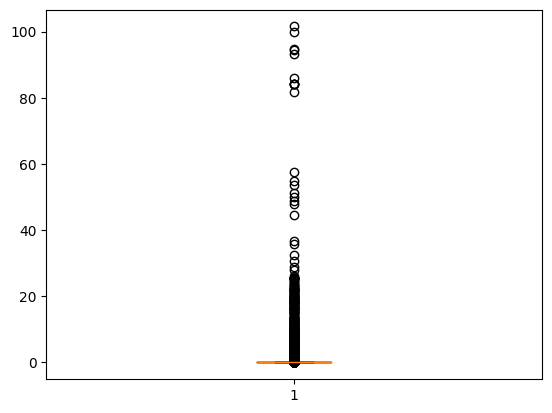

In [ ]:
# 5.5
plt.boxplot(error_dx)

In [ ]:
# 6.0
Q1 = np.percentile(error_dx, 0.5)
Q3 = np.percentile(error_dx, 99.5)
IQR = Q3 - Q1

# 6.1 Define Lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# 6.2 Identify outliers
outliers = (error_dx < lower_bound) | (error_dx > upper_bound)

# 6.3 Count outliers
num_outliers = np.sum(outliers)
print("Total Outliers : ", num_outliers)

-1.9003987610982884
3.1736004581912045
Total Outliers :  503


In [ ]:
# 7.0
outlier_indices = np.where(outliers)[0]

In [ ]:
# 7.1
outlier_indices

array([  1630,   5422,   6793,  10417,  10577,  10637,  10738,  10858,
        11978,  12102,  12175,  12270,  12412,  12866,  12882,  13338,
        13349,  13443,  13561,  13568,  13669,  13777,  13886,  13970,
        14859,  15106,  15300,  16037,  16776,  17245,  17511,  17835,
        18044,  18069,  18566,  19060,  19098,  22550,  23042,  24545,
        29714,  39665,  42130,  42183,  42206,  43149,  43286,  43299,
        44115,  44806,  46698,  47597,  47864,  48381,  48807,  50138,
        53863,  58304,  61170,  61802,  63386,  68283,  68687,  69199,
        69861,  72036,  72061,  72249,  72784,  74005,  74223,  74517,
        76067,  76089,  76519,  77050,  77623,  79105,  79915,  82132,
        85790,  90735,  91684,  98247,  98453, 104735, 105778, 108186,
       110010, 110228, 110369, 117139, 117395, 117417, 117730, 118519,
       118675, 119385, 119838, 121538, 130879, 131218, 140509, 144741,
       144809, 150268, 150790, 150973, 153288, 153494, 153519, 154946,
      

In [ ]:
# 7.2
np.sum(outlier_indices>284300)

248

In [ ]:
# 7.3
df.shape[0] - df_f.shape[0]

284315

In [ ]:
# 7.4
error_g = error_dx[0:df_g.shape[0]]

In [ ]:
# 7.5
mean_g = error_g.mean()

In [ ]:
# 7.6
stnd = error_g.std()

In [ ]:
# 7.7
error_g = np.abs(error_dx[0:df_g.shape[0]] / stnd)
error_f = np.abs(error_dx[-492:] / stnd)

In [ ]:
# 7.8
np.sum(error_g > 3)
print('\n----------------')
np.sum(error_f > 3)

1270


----------------


385

In [ ]:
# 8.0
minus_error[0:492]

array([-6.73312555e-03, -6.13862977e-02,  3.23302939e-02, -2.89488831e-02,
        3.47809725e-02, -6.06055899e-02, -5.42359696e-02,  3.11852659e-01,
       -2.88547838e-02, -2.56356874e-02, -5.70514567e-02, -1.76183484e-02,
       -5.08798319e-02, -5.92504090e-02,  2.36195778e-01,  2.22780724e-02,
       -5.54382887e-02,  5.00110794e-03,  7.24336167e-01, -5.95837131e-02,
       -3.97626197e-02, -3.98598509e-02, -5.43959395e-02,  3.19102639e-01,
        4.23616055e-02,  8.74148624e-02, -5.29722933e-02, -5.00679483e-02,
       -4.88485470e-02, -5.97929714e-02, -6.12343334e-02, -6.22515397e-02,
       -3.06839322e-02, -3.06839322e-02, -3.05042132e-02, -3.05042132e-02,
        2.14645463e-02, -4.13869311e-02, -4.40312749e-02, -6.28877834e-02,
       -4.65301773e-02, -3.87204925e-02, -4.19703663e-02, -2.79904831e-02,
       -9.31750346e-03, -5.67057031e-02, -3.28992551e-02,  1.26637634e-01,
       -3.53041202e-02, -3.63147373e-02, -5.75499745e-02,  4.37682578e-01,
        5.37457719e-02, -

In [ ]:
# 8.1 Count elements greater than 0
count_greater_than_0 = np.sum(minus_error > 0)

# 8.2 Count elements less than 0
count_less_than_0 = np.sum(minus_error < 0)

print(f'Number of elements greater than 0: {count_greater_than_0}')
print(f'Number of elements less than 0: {count_less_than_0}')

Number of elements greater than 0: 61067
Number of elements less than 0: 223740


In [ ]:
##########################3